- ## Escolha do modelo
- ## Treinamento do modelo
- ## Teste do modelo
- ## Armazenamento do modelo

In [28]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning
warnings.filterwarnings('ignore') # inibe a exibição de avisos de warning

In [29]:
# modelos de regressão
from sklearn.linear_model import LinearRegression # se ajusta a um modelo linear minimizando a soma dos quadrados residuais entre as previsões e os valores observados
from sklearn.linear_model import Lasso # modelo de regressão linear que utiliza a regularização L1 para estimar coeficientes esparsos, ajudando a evitar o overfitting
from sklearn.linear_model import ElasticNet # método de regressão regularizada que combina penalidades de Lasso (L1) e Ridge (L2) para melhorar a previsibilidade do modelo

from sklearn.tree import DecisionTreeRegressor # utilizam uma estrutura semelhante a uma árvore para classificar dados em categorias diferentes, permitindo decisões baseadas em características das entradas
from sklearn.neighbors import KNeighborsRegressor # modelo de regressão que utiliza os k-vizinhos mais próximos para prever o alvo
from sklearn.svm import SVR # (Suporte à Regressão Vetorial) é uma técnica de aprendizado de máquina utilizada para realizar regressões e pode lidar com kernels lineares e não-lineares

from sklearn.ensemble import RandomForestRegressor # estimador meta que ajusta uma série de regressões de árvores de decisão em subamostras do conjunto de dados e usa a média para melhorar a precisão das previsões
from sklearn.ensemble import GradientBoostingRegressor # estimador que constrói um modelo aditivo de forma progressiva e permite a otimização de funções de perda diferenciáveis
from sklearn.ensemble import ExtraTreesRegressor # método de aprendizado de conjunto para tarefas de regressão que constrói múltiplas árvores de decisão e média suas previsões para melhor desempenho
from sklearn.ensemble import AdaBoostRegressor # metamodelo que começa ajustando um regressor no conjunto de dados original e, em seguida, ajusta cópias adicionais do regressor em cópias ponderadas do conjunto de dados

from sklearn.neural_network import MLPRegressor # modelo de regressão que utiliza uma rede neural de múltiplas camadas para otimizar o erro quadrático

In [30]:
# análise de dados e avaliação dos modelos
from sklearn.model_selection import train_test_split # utilizada para dividir conjuntos de dados em subconjuntos de treino e teste, ajudando na validação de modelos
from sklearn.model_selection import KFold # técnica de validação cruzada que divide um conjunto de dados em 'k' subconjuntos (folds) para treinar e testar modelos, garantindo que cada exemplo seja usado para treinamento e teste
from sklearn.model_selection import cross_val_score # avalia o desempenho de um estimador usando validação cruzada. Ela divide os dados em k partes e treina o modelo k vezes

from sklearn.metrics import mean_squared_error # métrica de avaliação que mede a média dos erros quadráticos entre os valores previstos e os valores reais

In [31]:
# modelos de aprendizado profundo
from keras.models import Sequential # permite agrupar uma pilha linear de camadas em um modelo, facilitando a construção de redes neurais
from keras.layers import Dense # camada fundamental em redes neurais, onde cada neurônio está conectado a todos os neurônios da camada anterior, o que a torna amplamente utilizada em redes de múltiplas camadas
from keras.optimizers import SGD # otimizador usado em Keras que atualiza os parâmetros com base no gradiente e na taxa de aprendizado definida
from tensorflow.keras.optimizers import Adam # método de descida de gradiente estocástico que usa estimativas adaptativas de momentos de primeira e segunda ordem
from keras.layers import LSTM # camada de rede neural recorrente que é utilizada para modelar sequências temporais, capaz de aprender padrões de longo prazo em dados sequenciais

In [32]:
# modelos de séries temporais
from statsmodels.tsa.arima_model import ARIMA # modelo estatístico usado para análise de séries temporais
import statsmodels.api as sm # Modelo Estrutural é uma abordagem usada em estatística e econometria para modelar relações complexas entre variáveis

In [33]:
# preparação e visualização de dados
# pandas, pandas_datareader, numpy e matplotlib
import numpy as np # computação de matrizes
from matplotlib import pyplot # plotagem gráfica

In [34]:
# carregando arquivo tratado em dataframe
df_risk = pd.read_csv('df_treated/df_risk_tolerance.csv')

In [35]:
# conferindo a dimensão do dataframe, linhas e colunas
df_risk.shape

(3930, 12)

In [36]:
# ordenando pelo index o dataframe carregado
df_risk = df_risk.sort_index()

In [37]:
# reconhecendo as primeiras linhas do df
df_risk.head(5)

,AGE,EDCL,MARRIED,KIDS,OCCAT1,INCOME,NETWORTH,tolerancia_risco,RISK,standard__AGE,standard__INCOME,standard__NETWORTH
0,63.0,4,1,0,1,324273.547090,2391000.0,0.791073,1,0.673961,2.217976,1.887917
1,63.0,4,1,0,1,324273.547090,2421310.0,0.791271,1,0.673961,2.217976,1.925633
2,63.0,4,1,0,1,324273.547090,1957700.0,0.753915,1,0.673961,2.217976,1.348739
3,68.0,4,1,0,3,95120.240481,2720900.0,0.464435,3,0.975590,-0.486886,2.298428
4,68.0,4,1,0,3,95120.240481,2626900.0,0.463466,3,0.975590,-0.486886,2.181459


In [38]:
df_risk = df_risk.drop(columns=['AGE','INCOME','NETWORTH'], axis=1)

In [39]:
list(df_risk.columns)

['EDCL',
 'MARRIED',
 'KIDS',
 'OCCAT1',
 'tolerancia_risco',
 'RISK',
 'standard__AGE',
 'standard__INCOME',
 'standard__NETWORTH']

In [40]:
df_risk.columns = ['EDCL',\
                    'MARRIED',\
                    'KIDS',\
                    'OCCAT1',\
                    'tolerancia_risco',\
                    'RISK',\
                    'AGE',\
                    'INCOME',\
                    'NETWORTH']

In [41]:
# verificando a posição de cada variável
df_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDCL              3930 non-null   int64  
 1   MARRIED           3930 non-null   int64  
 2   KIDS              3930 non-null   int64  
 3   OCCAT1            3930 non-null   int64  
 4   tolerancia_risco  3930 non-null   float64
 5   RISK              3930 non-null   int64  
 6   AGE               3930 non-null   float64
 7   INCOME            3930 non-null   float64
 8   NETWORTH          3930 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 276.5 KB


In [42]:
# separando variáveis independentes(x) e dependente(y)
X = df_risk.drop(columns='tolerancia_risco', axis=1)
y = df_risk[['tolerancia_risco']]

In [43]:
print('X=', X.info())
print('y=', y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   EDCL      3930 non-null   int64  
 1   MARRIED   3930 non-null   int64  
 2   KIDS      3930 non-null   int64  
 3   OCCAT1    3930 non-null   int64  
 4   RISK      3930 non-null   int64  
 5   AGE       3930 non-null   float64
 6   INCOME    3930 non-null   float64
 7   NETWORTH  3930 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 245.8 KB
X= None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tolerancia_risco  3930 non-null   float64
dtypes: float64(1)
memory usage: 30.8 KB
y= None


In [44]:
# separando os sets de treino e teste em 20% para teste e 80% para treino
test_size = 0.20
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [45]:
# hiperparâmetros do CV (cross validation)
num_folds = 10
scoring = 'r2'

In [46]:
# implementando os modelos de ML
models = []

# regressão e árvore de regressão
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# ensemble - boosting
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))

# ensemble - bagging
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

- Foi criado uma lista de modelos para automatizar o treinamento e a avaliação de todos eles, evitando que o trabalho fosse feito repetidamente de forma manual, tornando o trabalho mais rápido e preciso.

### Treinando os Modelos: 'EN', 'LASSO', 'LR', 'KNN', 'SVR', 'GBR', 'RFR', 'ETR', 'CART', 'ABR'

In [47]:
# obtendo os scores do k-fold e o erro quadrático médio entre o resultado conhecido e o resultado previsto
names = []
kfold_results = []
test_results = []
train_results = []

for name, model in models:
    names.append(name)

    if name in ('EN', 'LASSO'): #'EN', 'LASSO'): 
        divisorC, divisorK=1, 1
        divisorC=100 # modificando a escala para visualizar no gráfico   
        #divisorK=10  
    else:
        if name in ('LR', 'KNN', 'SVR', 'GBR', 'RFR', 'ETR', 'CART', 'ABR'): 
            divisorC, divisorK= 1, 1
            #divisorK=0.1 # modificando a escala para visualizar no gráfico  
            #divisorC=0.1          

    # análise k-fold
    kfold = KFold(n_splits=num_folds, random_state=None)

    # erro quadrático médio convertido para positivo. Quanto menor melhor.
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv= kfold, scoring=scoring)
    kfold_results.append(cv_results/divisorK)

    # período completo de treinamento
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result/divisorC)
    if name in ('LR'):
        LR_model = res

    # resultado dos testes
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result/divisorC)

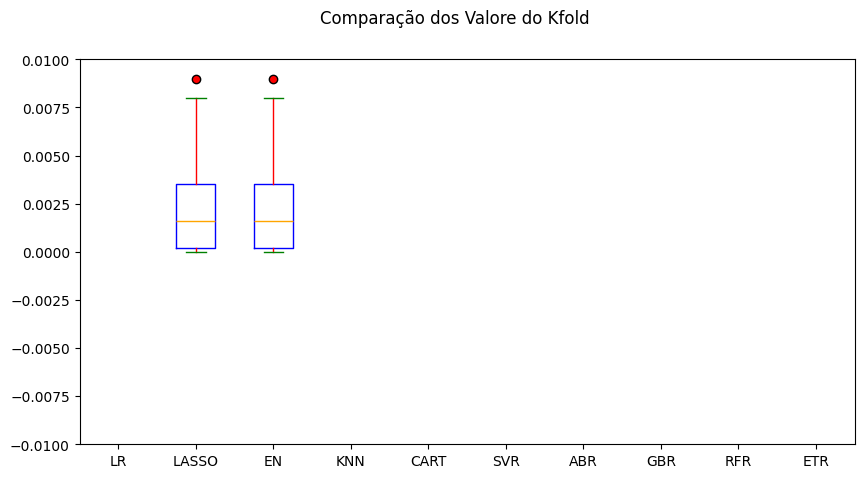

In [48]:
# comparando resultados da validação cruzada
# quanto maior o cross_val_score o modelo é mais consistente e generalizável
fig = pyplot.figure()
fig.suptitle('Comparação dos Valore do Kfold')
ax = fig.add_subplot(111)
ymin= -0.01
ymax= 0.01
pyplot.ylim(ymin, ymax)
pyplot.boxplot(kfold_results, boxprops=dict(color='blue'), whiskerprops=dict(color='red'), \
               capprops=dict(color='green'), medianprops=dict(color='orange'), \
               flierprops=dict(markerfacecolor='red', marker='o'))
ax.set_xticklabels(names)
fig.set_size_inches(10,5)
pyplot.show()

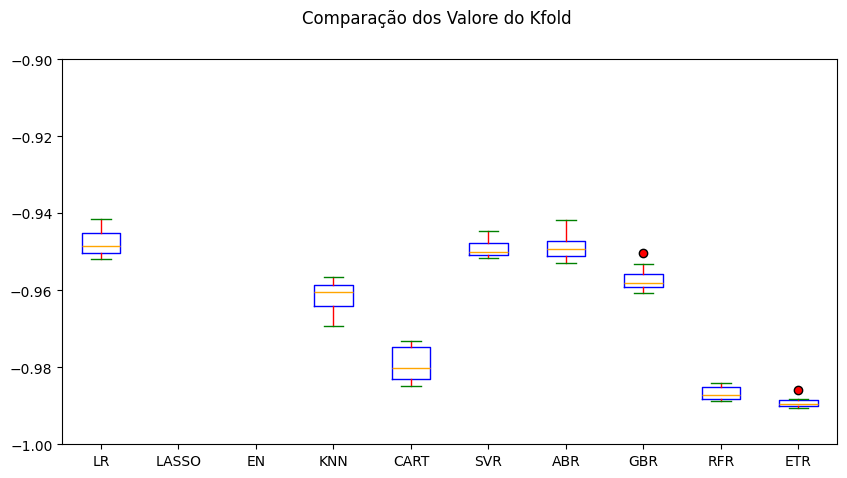

In [49]:
# comparando resultados da validação cruzada
# quanto maior o cross_val_score o modelo é mais consistente e generalizável
fig = pyplot.figure()
fig.suptitle('Comparação dos Valore do Kfold')
ax = fig.add_subplot(111)
ymin= -1.0
ymax= -0.9
pyplot.ylim(ymin, ymax)
pyplot.boxplot(kfold_results, boxprops=dict(color='blue'), whiskerprops=dict(color='red'), \
               capprops=dict(color='green'), medianprops=dict(color='orange'), \
               flierprops=dict(markerfacecolor='red', marker='o'))
ax.set_xticklabels(names)
fig.set_size_inches(10,5)
pyplot.show()

- Um valor maior de cross_val_score geralmente sugere que o modelo se adapta melhor aos dados e apresenta um desempenho superior na validação cruzada. 
- LASSO E ElasticNet (EN) apresentaram o melhor resultado do kfold, então seriam até agora os escolhidos baseados nessa avaliação.

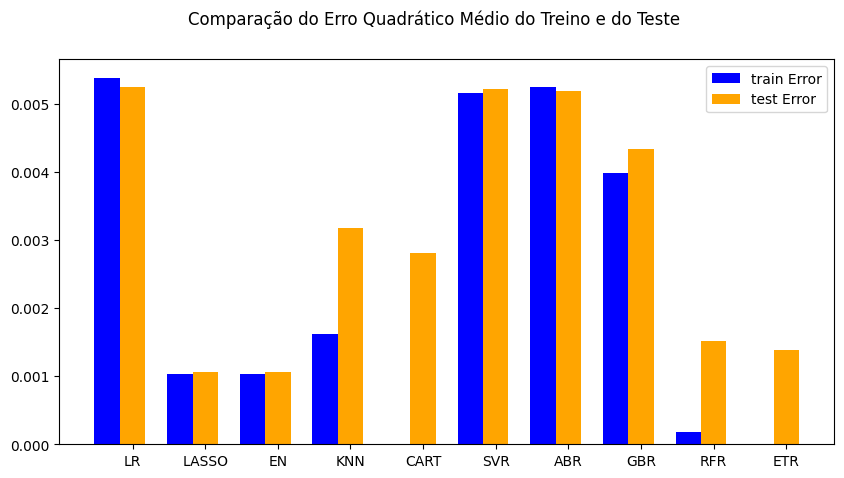

In [50]:
# analisando o erro de treinamento e de teste
# comparando algoritmos
fig = pyplot.figure()

ind = np.arange(len(names)) # as localidades x para os grupos
width = 0.35 # largura das barras

fig.suptitle('Comparação do Erro Quadrático Médio do Treino e do Teste')
ax = fig.add_subplot(111)
pyplot.bar(ind - width, train_results, width=width, label='train Error', color='blue')
pyplot.bar(ind, test_results, width=width, label='test Error', color='orange')
fig.set_size_inches(10,5)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.savefig('grafic_image/compara_erro.png', format='png')
pyplot.show()


- Verificamos que o modelo LR - Linear Regression teve o melhor desempenho relativo ao erro quadrático médio, apresentou o menor erro em conjunto de treino e teste.

- Com exceção do LR os demais modelos apresentaram o erro quadrático médio do teste maior que o erro quadrático médio do treino, o que pode levar a um overfitting, dessa forma elegeremos somente o LR como modelo escolhido dessa comparação mesmo que o seu cross_val_score tenha sido menor que o LASSO e o EN.

In [51]:
# verificando a relação do erro de test sobre o erro de treino
for i in range(10):
    if train_results[i] == 0:
        print('ERRO de teste', names[i], test_results[i])
        print('relação DO ERRO de teste sobre O ERRO de treino', names[i], 0)
    else:
        print('ERRO de teste', names[i], test_results[i])
        print('relação DO ERRO de teste sobre O ERRO de treino', names[i], (test_results[i]/train_results[i]) * 100)

ERRO de teste LR 0.005245323037327824
relação DO ERRO de teste sobre O ERRO de treino LR 97.4715713840879
ERRO de teste LASSO 0.0010536096991963573
relação DO ERRO de teste sobre O ERRO de treino LASSO 101.72374968778732
ERRO de teste EN 0.0010536096991963573
relação DO ERRO de teste sobre O ERRO de treino EN 101.72374968778732
ERRO de teste KNN 0.0031795755588777063
relação DO ERRO de teste sobre O ERRO de treino KNN 196.73440855022014
ERRO de teste CART 0.0028079393092915413
relação DO ERRO de teste sobre O ERRO de treino CART 1105215.7431825001
ERRO de teste SVR 0.0052096253008245335
relação DO ERRO de teste sobre O ERRO de treino SVR 101.15653554194257
ERRO de teste ABR 0.005183490636541206
relação DO ERRO de teste sobre O ERRO de treino ABR 98.85767838605966
ERRO de teste GBR 0.004326880255305618
relação DO ERRO de teste sobre O ERRO de treino GBR 108.72913447056054
ERRO de teste RFR 0.0015213620353280771
relação DO ERRO de teste sobre O ERRO de treino RFR 849.6452915605826
ERRO d

- O modelo LR apresentou a melhor relação 90% do erro de teste sobre o erro de treino, sendo o eleito dentre todos os modelos.

- Um valor elevado de Mean Squared Error (MSE) indica que o modelo não está fazendo previsões próximas dos valores reais, sugerindo uma baixa precisão nas suas previsões.

- Quando o erro quadrático médio (MSE) do conjunto de teste é maior que o do conjunto de treinamento, isso pode indicar um problema de overfitting, onde o modelo se ajustou muito bem aos dados de treinamento, mas não generaliza bem para os dados novos.

## Faz o Deploy do Modelo

In [52]:
# faz o deploy do modelo para ser utilizado posteriormente
from joblib import dump

dump(LR_model, 'model/LR_risk_tolerance.pkl')

['model/LR_risk_tolerance.pkl']